In this notebook, we will analyze game sales and consoles sold to determine which gaming console was the most successful. Additionally, we will explore how specific regions or game genres contribute to the success of the console.

Import the needed modules.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Feature:
Read in the data.

In [3]:
console = pd.read_csv(r"data/best_selling_consoles.csv")
games = pd.read_csv(r"data/video_games_sales.csv")

Feature: Cleaning and merging the DataFrames and calculating new values.

Checking the games dataframe.

In [4]:
games.head(5)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
games.tail(5)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [6]:
games.columns


Index(['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales'],
      dtype='object')

Cleaning games column names.

In [7]:
games.columns = games.columns.str.title() .str.strip() .str.replace('_', ' ')

Dropping unneeded games columns.

In [8]:
games_clean = games.drop('Rank', axis=1)
games_clean.head(5)

,Name,Platform,Year,Genre,Publisher,Na Sales,Eu Sales,Jp Sales,Other Sales,Global Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Checking console.

In [9]:
console.head(10)

,Console Name,Type,Company,Released Year,Discontinuation Year,Units sold (million),Remarks
0,PlayStation 2,Home,Sony,2000,2013,155.00,Final sales are greater than 155 million
1,Nintendo DS,Handheld,Nintendo,2004,2013,154.02,NaN
2,Nintendo Switch,Hybrid,Nintendo,2017,0,122.55,NaN
3,Game Boy,Handheld,Nintendo,1989,2003,64.42,The Game Boy (1989) and the Game Boy Color (19...
4,Game Boy Color,Handheld,Nintendo,1998,2003,44.06,NaN
5,PlayStation 4,Home,Sony,2013,0,117.20,NaN
6,PlayStation,Home,Sony,1994,2006,102.49,NaN
7,Wii,Home,Nintendo,2006,2013,101.63,NaN
8,PlayStation 3,Home,Sony,2006,2017,87.40,Final sales are greater than 87.4 million
9,Xbox 360,Home,Microsoft,2005,2016,84.00,Final sales are greater than 84 million


Checking console column names.

In [10]:
console.columns

Index(['Console Name', 'Type', 'Company', 'Released Year',
       'Discontinuation Year', 'Units sold (million)', 'Remarks'],
      dtype='object')

Dropping not needed columns.

In [11]:
console_clean = console.drop('Remarks', axis=1)

Renaming 'Console name' to 'Platform'.

In [12]:
console_clean = console_clean.rename(columns={'Console Name': 'Platform'})
console_clean.head(5)

,Platform,Type,Company,Released Year,Discontinuation Year,Units sold (million)
0,PlayStation 2,Home,Sony,2000,2013,155.00
1,Nintendo DS,Handheld,Nintendo,2004,2013,154.02
2,Nintendo Switch,Hybrid,Nintendo,2017,0,122.55
3,Game Boy,Handheld,Nintendo,1989,2003,64.42
4,Game Boy Color,Handheld,Nintendo,1998,2003,44.06


Checking how each dataframe lists different consoles in the platform column.

In [13]:
console_clean['Platform'].unique()

array(['PlayStation 2', 'Nintendo DS', 'Nintendo Switch', 'Game Boy',
       'Game Boy Color', 'PlayStation 4', 'PlayStation', 'Wii',
       'PlayStation 3', 'Xbox 360', 'Game Boy Advance',
       'PlayStation Portable', 'Nintendo 3DS', 'NES/Famicom', 'Xbox One',
       'SNES/Super Famicom', 'Game & Watch', 'Nintendo 64',
       'Sega Genesis/Mega Drive', 'PlayStation 5', 'Atari 2600', 'Xbox',
       'GameCube', 'Xbox Series X/S', 'Wii U', 'PlayStation Vita',
       'Sega Master System', 'Sega Game Gear', 'PC Engine/TurboGrafx-16',
       'Sega Saturn', 'Dreamcast', 'Master System(Brazilian variants)',
       'Dendy(Famiclone)', 'Super NES Classic Edition',
       'Famicom Disk System', 'NES Classic Edition', 'WonderSwan',
       'Sega Pico', 'Color TV-Game', 'Intellivision',
       'Mega Drive(Brazilian variants)', 'N-Gage', 'Sega CD',
       'ColecoVision', 'Magnavox Odyssey', 'PC Engine CD-ROM',
       'Atari 7800', 'Atari Lynx', 'Philips CD-i', 'Telstar',
       'Atari 5200'], dtyp

In [14]:
games_clean['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Matching and verifying the platforms in the console dataframe so it can merge with console dataframe. *Interesting tidbit I wrote this matching out by hand on a sheet of paper before typing to make sure that it all was exact.  

In [15]:
platform_matching ={
    'NES': 'NES/Famicom',
    'GB': 'Game Boy',
    'DS': 'Nintendo DS',
    'X360': 'Xbox 360',
    'PS3': 'PlayStation 3',
    'PS2': 'PlayStation 2',
    'SNES': 'SNES/Super Famicom',
    'GBA': 'Game Boy Advance',
    '3DS': 'Nintendo 3DS',
    'PS4': 'PlayStation 4',
    'N64': 'Nintendo 64',
    'PS': 'PlayStation',
    'XB': 'Xbox',
    '2600': 'Atari 2600',
    'PSP': 'PlayStation Portable',
    'XOne': 'Xbox One',
    'GC':'GameCube',
    'WiiU':'Wii U',
    'GEN':'Sega Genesis/Mega Drive',
    'DC': 'DreamCast',
    'PSV': 'PlayStation 5',
    'SAT': 'Sega Saturn',
    'SCD': 'Sega CD',
    'WS':'Wonderswan',
    'TG16': 'PC Engine/TurboGrafx-16',
    'GG':'Sega Game Gear'}


games_clean['Platform'] = games_clean['Platform'].replace(platform_matching)
games_clean

,Name,Platform,Year,Genre,Publisher,Na Sales,Eu Sales,Jp Sales,Other Sales,Global Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES/Famicom,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,Game Boy,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,Game Boy Advance,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GameCube,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PlayStation 2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,Nintendo DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Merging the dataframes on the Platform column.

In [16]:
games_console_mergered = pd.merge(games_clean, console_clean, on='Platform', how='inner')
games_console_mergered.head(10)

,Name,Platform,Year,Genre,Publisher,Na Sales,Eu Sales,Jp Sales,Other Sales,Global Sales,Type,Company,Released Year,Discontinuation Year,Units sold (million)
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Home,Nintendo,2006,2013,101.63
1,Super Mario Bros.,NES/Famicom,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Home,Nintendo,1983,2003,61.91
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Home,Nintendo,2006,2013,101.63
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Home,Nintendo,2006,2013,101.63
4,Pokemon Red/Pokemon Blue,Game Boy,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Handheld,Nintendo,1989,2003,64.42
5,Tetris,Game Boy,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,Handheld,Nintendo,1989,2003,64.42
6,New Super Mario Bros.,Nintendo DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,Handheld,Nintendo,2004,2013,154.02
7,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,Home,Nintendo,2006,2013,101.63
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,Home,Nintendo,2006,2013,101.63
9,Duck Hunt,NES/Famicom,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,Home,Nintendo,1983,2003,61.91


Renaming columns in the merged dataframe.

In [17]:
cols_rename = {'Type': 'Console Type',
    'Company':'Console Manufacturer',
    'Released Year': 'Console Released',
    'Discontinuation Year': 'Console Discontinued',
    'Units sold (million)': 'Consoles Sold'}

merged_col_rename = games_console_mergered.rename(columns=(cols_rename))
merged_col_rename.head(5)

,Name,Platform,Year,Genre,Publisher,Na Sales,Eu Sales,Jp Sales,Other Sales,Global Sales,Console Type,Console Manufacturer,Console Released,Console Discontinued,Consoles Sold
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Home,Nintendo,2006,2013,101.63
1,Super Mario Bros.,NES/Famicom,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Home,Nintendo,1983,2003,61.91
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Home,Nintendo,2006,2013,101.63
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Home,Nintendo,2006,2013,101.63
4,Pokemon Red/Pokemon Blue,Game Boy,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Handheld,Nintendo,1989,2003,64.42


Checking for nulls.

In [18]:
merged_col_rename.isna().sum()

Name                      0
Platform                  0
Year                    254
Genre                     0
Publisher                52
Na Sales                  0
Eu Sales                  0
Jp Sales                  0
Other Sales               0
Global Sales              0
Console Type              0
Console Manufacturer      0
Console Released          0
Console Discontinued      0
Consoles Sold             0
dtype: int64

Filling the nulls.

In [19]:
merged_col_rename['Year'] = merged_col_rename['Year'].fillna(0).astype(int)
merged_col_rename['Publisher'] = merged_col_rename['Publisher'].fillna('Unknown')

Creating a couple unique values from the combined dataframe.

Matching the game release year to the console release year to get the launch global sales of the games.

In [20]:
games_yr_console_released = merged_col_rename[merged_col_rename['Year'] == merged_col_rename["Console Released"]]
games_yr_console_released.head(5)

,Name,Platform,Year,Genre,Publisher,Na Sales,Eu Sales,Jp Sales,Other Sales,Global Sales,Console Type,Console Manufacturer,Console Released,Console Discontinued,Consoles Sold
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Home,Nintendo,2006,2013,101.63
5,Tetris,Game Boy,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,Handheld,Nintendo,1989,2003,64.42
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,Home,Nintendo,2006,2013,101.63
18,Super Mario World,SNES/Super Famicom,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61,Home,Nintendo,1990,2003,49.10
21,Super Mario Land,Game Boy,1989,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14,Handheld,Nintendo,1989,2003,64.42


Plot 1:
Plotting the launch year games sales.

In [21]:
launch_year_game_sales = games_yr_console_released.groupby('Platform')['Global Sales'].sum().reset_index()


Text(0, 0.5, 'Launch Year Game Sales(Millions)')

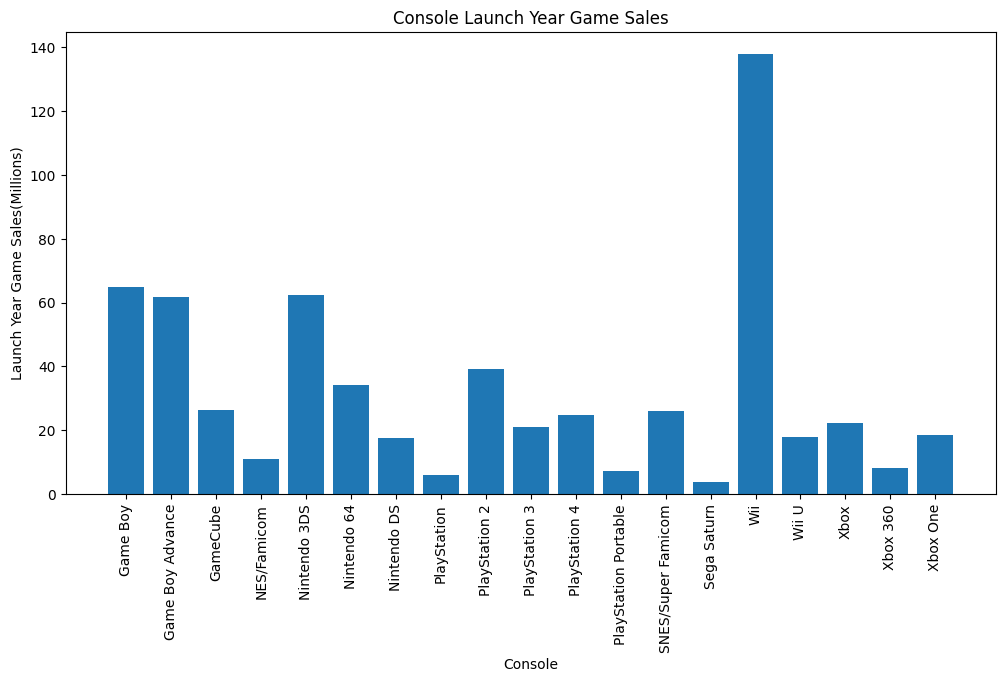

In [22]:

plt.figure(figsize=(12, 6))
plt.bar(launch_year_game_sales['Platform'], launch_year_game_sales['Global Sales'])
plt.title('Console Launch Year Game Sales')
plt.xlabel('Console')
plt.xticks(rotation=90)
plt.ylabel('Launch Year Game Sales(Millions)')

Looking at the Top 5 consoles by Launch year game sales.

In [23]:
launch_year_game_sales.sort_values('Global Sales', ascending=False).head(5) 

,Platform,Global Sales
14,Wii,137.91
0,Game Boy,64.98
4,Nintendo 3DS,62.53
1,Game Boy Advance,61.62
8,PlayStation 2,39.11


The Wii clearly had the best launch year in terms of game sales with $137.91M in gamesales.


Matching the game release year to console discontinued year to get the global sales of the games in the last year of the consoles life.

In [24]:
games_console_discontinued = merged_col_rename[merged_col_rename['Year'] == merged_col_rename["Console Discontinued"]]
console_discontinued_games = games_console_discontinued.groupby('Platform')['Global Sales'].sum().reset_index()
console_discontinued_games

,Platform,Global Sales
0,GameCube,0.27
1,Nintendo 64,0.08
2,Nintendo DS,1.96
3,PlayStation 5,0.30
4,PlayStation Portable,0.24
5,Wii,9.36
6,Xbox 360,0.83


Plot 2:
Plotting the games sales that launched in the consoles final year.

Text(0, 0.5, 'Launch Year Game Sales(Millions)')

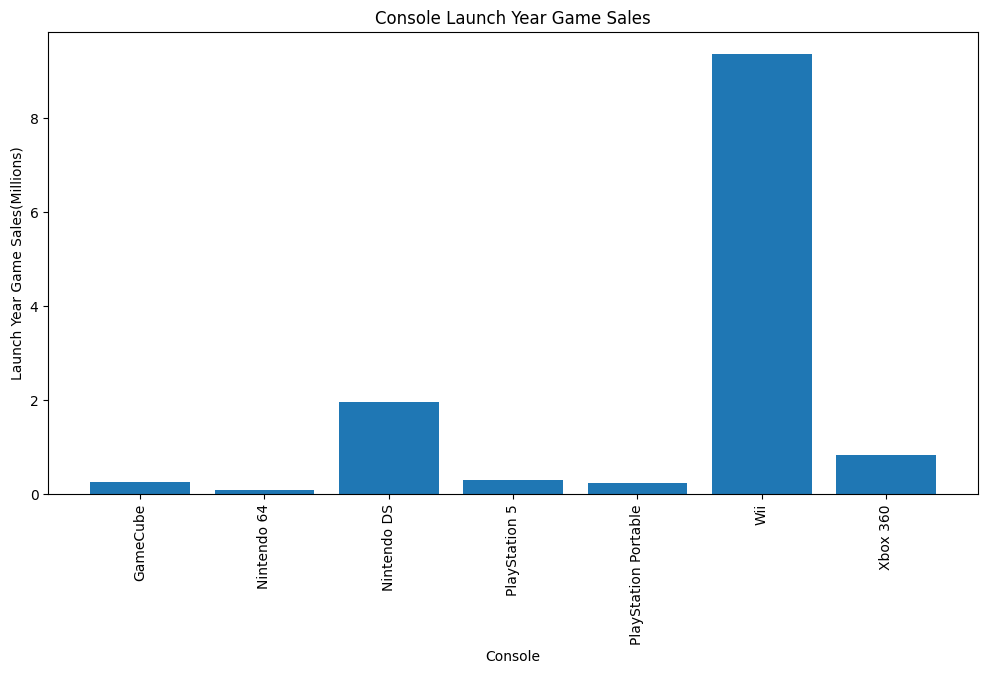

In [25]:
plt.figure(figsize=(12, 6))
plt.bar(console_discontinued_games['Platform'], console_discontinued_games['Global Sales'])
plt.title('Console Launch Year Game Sales')
plt.xlabel('Console')
plt.xticks(rotation=90)
plt.ylabel('Launch Year Game Sales(Millions)')

In [26]:
console_discontinued_games.sort_values('Global Sales', ascending=False)

,Platform,Global Sales
5,Wii,9.36
2,Nintendo DS,1.96
6,Xbox 360,0.83
3,PlayStation 5,0.30
0,GameCube,0.27
4,PlayStation Portable,0.24
1,Nintendo 64,0.08


As you can see theres very few consoles that even had games that launched in last year of the consoles life. Again the Wii had the best end life year with $9.36M in game sells, just as it had the best launch year in terms of global sales of its games. 

Plot 3: 
A plot to show the number in millions of console units sold globally. 

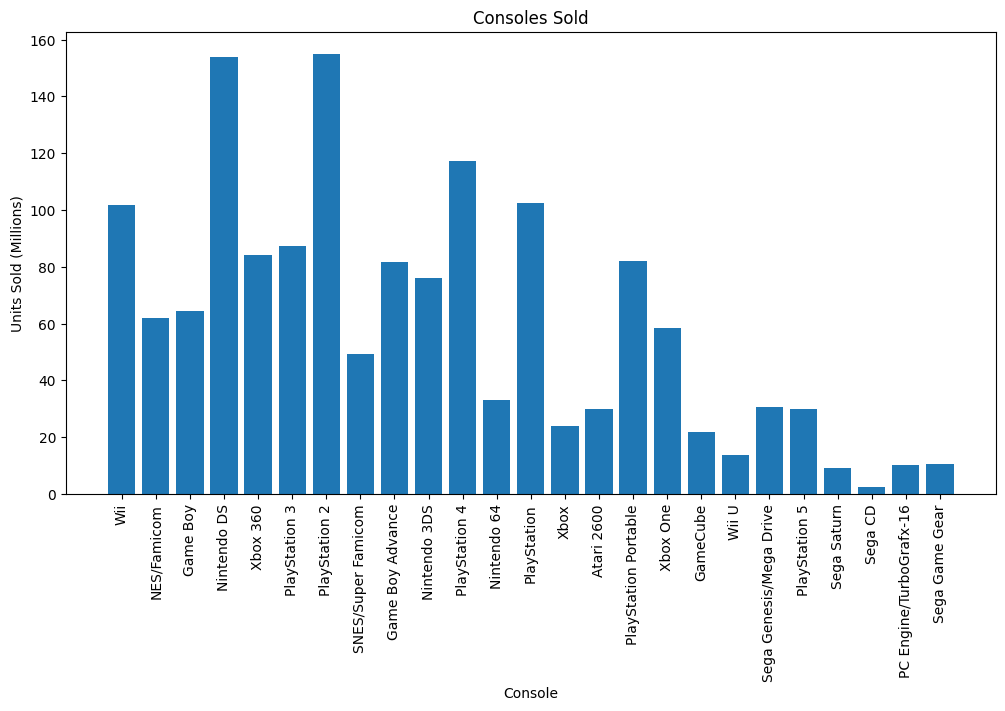

In [27]:
plt.figure(figsize=(12, 6))
plt.bar(merged_col_rename['Platform'], merged_col_rename["Consoles Sold"])
plt.title('Consoles Sold')
plt.xlabel('Console')
plt.xticks(rotation=90)
plt.ylabel('Units Sold (Millions)')
plt.show()

Aggregating the console sold so the number doesnt appear highly inflated.

In [28]:
console_sold = merged_col_rename.groupby('Platform').agg({'Consoles Sold': 'first' })
console_sold.sort_values('Consoles Sold', ascending=False).head(5)

,Consoles Sold
Platform,
PlayStation 2,155.00
Nintendo DS,154.02
PlayStation 4,117.20
PlayStation,102.49
Wii,101.63


the top 2 in terms of consoles sold are the PlayStation 2 with 155.00M units and Nintendo DS with 154.02M

Feature: 3 plots have been made.
Don't worry though they will still be a few more plots on this journey through sales data to keep you entertained.  

Grouping global game sales by console. 

In [29]:
global_sales_platform = merged_col_rename.groupby('Platform')['Global Sales'].sum().reset_index()


Plot 4: 
plotting global game sales by console.

Text(0, 0.5, 'Global Game Sales(Millions)')

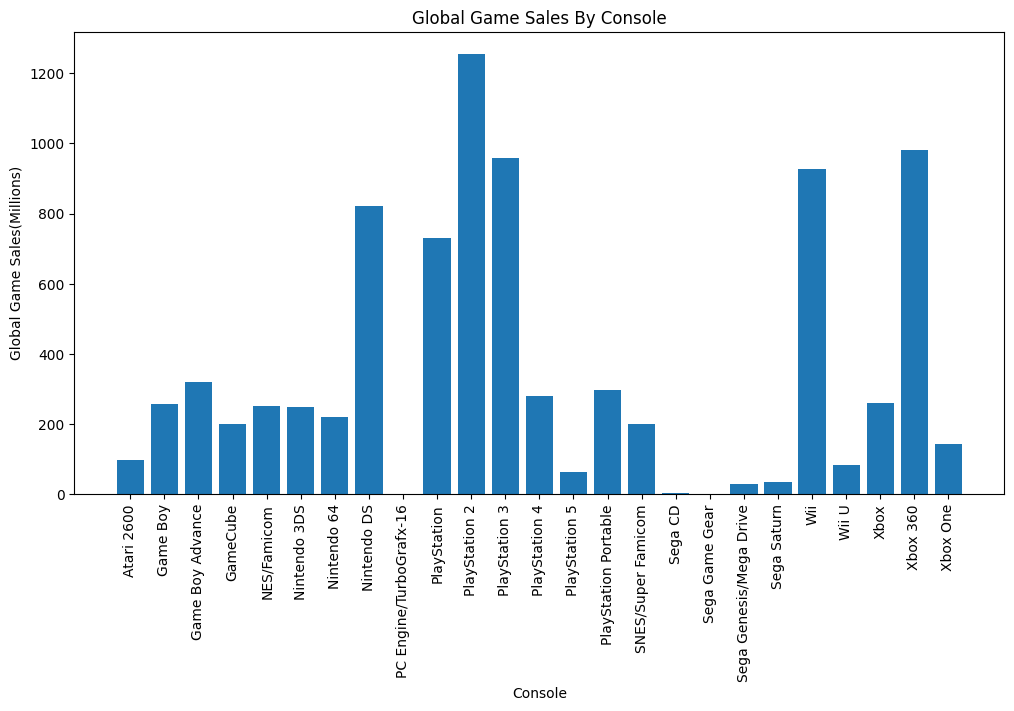

In [30]:
plt.figure(figsize=(12, 6))
plt.bar(global_sales_platform['Platform'], global_sales_platform['Global Sales'])
plt.title('Global Game Sales By Console')
plt.xlabel('Console')
plt.xticks(rotation=90)
plt.ylabel('Global Game Sales(Millions)')

In [31]:
global_sales_platform.sort_values('Global Sales', ascending=False).head(5)

,Platform,Global Sales
10,PlayStation 2,1255.64
23,Xbox 360,979.96
11,PlayStation 3,957.84
20,Wii,926.71
7,Nintendo DS,822.49


The PlayStation 2 clearly outsold all the other platforms games with $1.255B in Sales

Grouping and plotting the sales of the games by different regions. *This was one of the last plots I made for the project and discovered it was easier to plot with .plot().

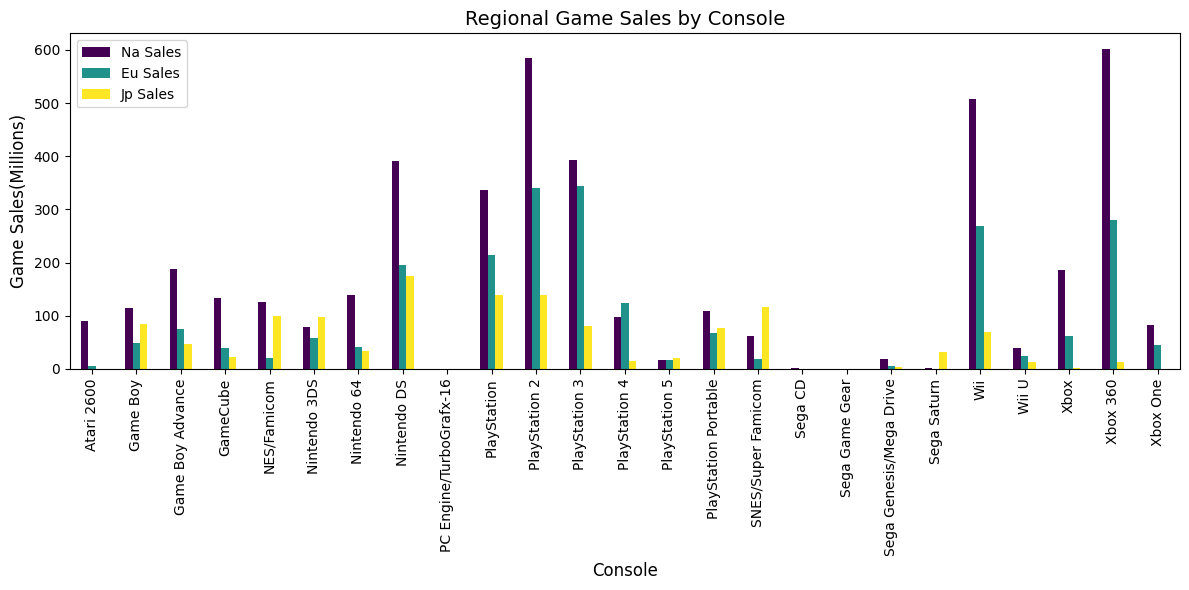

In [32]:
regional_sales = merged_col_rename.groupby('Platform')[['Na Sales', 'Eu Sales', 'Jp Sales']].sum()



regional_sales.plot(kind='bar', figsize=(12, 6), colormap= 'viridis')
plt.title('Regional Game Sales by Console', fontsize=14)
plt.xlabel('Console', fontsize= 12)
plt.ylabel('Game Sales(Millions)', fontsize= 12)
plt.tight_layout()


Looks Like regardless of the console that the North American and European regions are the biggest contributers to global sales for all platforms.  

Aggregating the console units sold first so the number doesn't end up being more units sold than people on the planet and the sum of the global sales to create a scatterplot. 

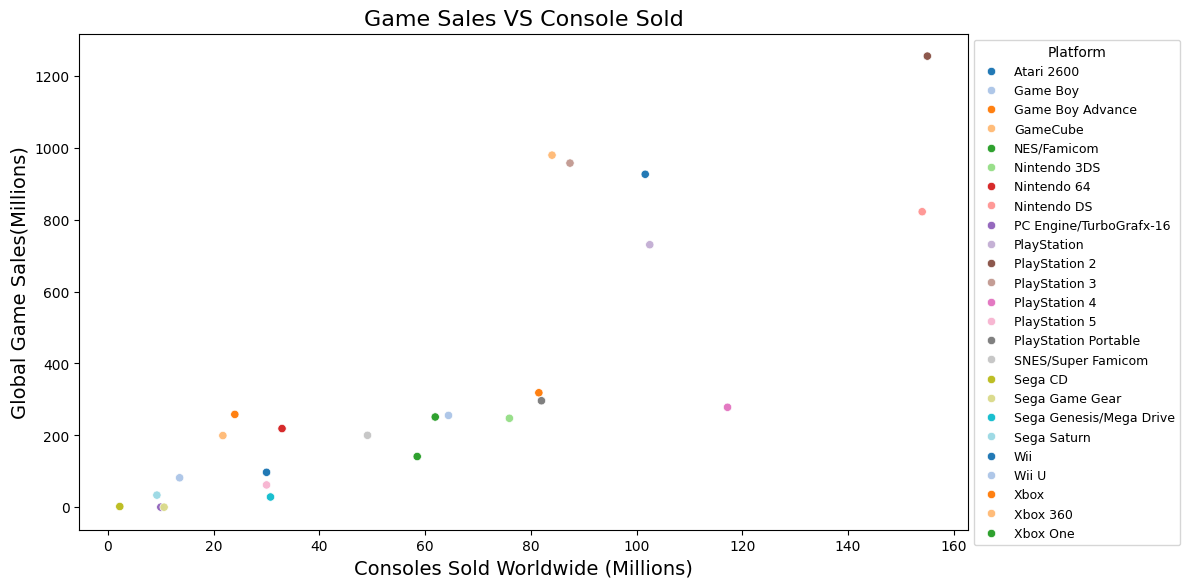

In [33]:
consoles_scatter = merged_col_rename.groupby('Platform').agg({'Global Sales': 'sum', 'Consoles Sold': 'first' })



plt.figure(figsize= (12, 6))
sns.scatterplot(x='Consoles Sold', y='Global Sales', hue='Platform', data=consoles_scatter, palette='tab20', alpha= .99)
plt.title('Game Sales VS Console Sold', fontsize= 16)
plt.xlabel('Consoles Sold Worldwide (Millions)', fontsize= 14)
plt.ylabel('Global Game Sales(Millions)', fontsize=14)
plt.legend(fontsize=9, title='Platform', bbox_to_anchor=(1, 1))
plt.tight_layout()

You can see that the PlayStation 2 is far ahead of the pack in terms of consoles sold and global game sales.

Now we are going to see if any specific game genres were responsible for the PlayStation 2's success.

Feature: Create a pivot table and create a seaborn plot from the pivot.


In [34]:
genre_pivot = pd.pivot_table(merged_col_rename, index='Genre', columns='Platform', values='Global Sales', aggfunc='sum')
genre_pivot


Platform,Atari 2600,Game Boy,Game Boy Advance,GameCube,NES/Famicom,Nintendo 3DS,Nintendo 64,Nintendo DS,PC Engine/TurboGrafx-16,PlayStation,...,SNES/Super Famicom,Sega CD,Sega Game Gear,Sega Genesis/Mega Drive,Sega Saturn,Wii,Wii U,Xbox,Xbox 360,Xbox One
Genre,,,,,,,,,,,,,,,,,,,,,
Action,29.34,7.92,55.76,37.84,28.75,57.02,29.58,115.56,NaN,127.05,...,10.08,NaN,NaN,2.74,0.65,118.58,19.35,49.28,242.67,33.79
Adventure,1.70,17.16,14.68,5.93,4.38,4.81,0.45,47.29,0.14,20.97,...,1.50,NaN,NaN,0.19,4.16,18.43,0.17,3.06,15.23,2.51
Fighting,1.24,NaN,4.21,18.43,6.54,10.46,22.08,7.20,NaN,72.68,...,26.95,NaN,NaN,5.90,8.52,23.86,6.36,13.55,37.64,2.31
Misc,3.58,13.35,36.25,16.73,3.59,10.48,11.19,137.76,NaN,44.90,...,5.02,0.10,NaN,0.03,1.20,221.06,12.23,9.58,91.96,6.86
Platform,13.27,54.91,78.30,28.66,95.78,32.23,36.13,77.45,NaN,64.21,...,65.65,1.50,0.04,15.45,0.76,90.74,21.24,9.66,11.39,0.81
Puzzle,14.68,47.47,12.92,4.70,21.00,5.57,3.41,84.29,NaN,12.08,...,6.38,NaN,NaN,NaN,1.00,15.67,1.33,0.42,0.85,NaN
Racing,2.91,4.55,18.80,21.89,9.78,14.49,40.09,38.64,NaN,103.19,...,13.49,0.07,NaN,0.26,2.40,61.28,7.77,31.49,65.99,8.80
Role-Playing,NaN,88.24,64.21,13.15,18.78,75.74,3.36,126.85,NaN,78.30,...,36.43,0.06,NaN,0.27,3.76,14.06,2.47,13.51,71.98,9.48
Shooter,26.48,1.20,3.60,13.63,35.62,1.29,19.27,8.20,0.02,39.31,...,6.07,NaN,NaN,0.13,3.98,28.77,6.17,63.55,278.55,51.61


Filling the NaNs of the pivot with 0 to make the heatmap complete. 

In [35]:
genre_pivot = genre_pivot.fillna(0)
genre_pivot

Platform,Atari 2600,Game Boy,Game Boy Advance,GameCube,NES/Famicom,Nintendo 3DS,Nintendo 64,Nintendo DS,PC Engine/TurboGrafx-16,PlayStation,...,SNES/Super Famicom,Sega CD,Sega Game Gear,Sega Genesis/Mega Drive,Sega Saturn,Wii,Wii U,Xbox,Xbox 360,Xbox One
Genre,,,,,,,,,,,,,,,,,,,,,
Action,29.34,7.92,55.76,37.84,28.75,57.02,29.58,115.56,0.00,127.05,...,10.08,0.00,0.00,2.74,0.65,118.58,19.35,49.28,242.67,33.79
Adventure,1.70,17.16,14.68,5.93,4.38,4.81,0.45,47.29,0.14,20.97,...,1.50,0.00,0.00,0.19,4.16,18.43,0.17,3.06,15.23,2.51
Fighting,1.24,0.00,4.21,18.43,6.54,10.46,22.08,7.20,0.00,72.68,...,26.95,0.00,0.00,5.90,8.52,23.86,6.36,13.55,37.64,2.31
Misc,3.58,13.35,36.25,16.73,3.59,10.48,11.19,137.76,0.00,44.90,...,5.02,0.10,0.00,0.03,1.20,221.06,12.23,9.58,91.96,6.86
Platform,13.27,54.91,78.30,28.66,95.78,32.23,36.13,77.45,0.00,64.21,...,65.65,1.50,0.04,15.45,0.76,90.74,21.24,9.66,11.39,0.81
Puzzle,14.68,47.47,12.92,4.70,21.00,5.57,3.41,84.29,0.00,12.08,...,6.38,0.00,0.00,0.00,1.00,15.67,1.33,0.42,0.85,0.00
Racing,2.91,4.55,18.80,21.89,9.78,14.49,40.09,38.64,0.00,103.19,...,13.49,0.07,0.00,0.26,2.40,61.28,7.77,31.49,65.99,8.80
Role-Playing,0.00,88.24,64.21,13.15,18.78,75.74,3.36,126.85,0.00,78.30,...,36.43,0.06,0.00,0.27,3.76,14.06,2.47,13.51,71.98,9.48
Shooter,26.48,1.20,3.60,13.63,35.62,1.29,19.27,8.20,0.02,39.31,...,6.07,0.00,0.00,0.13,3.98,28.77,6.17,63.55,278.55,51.61


Using seaborn to plot the heatmap using the created pivot table.

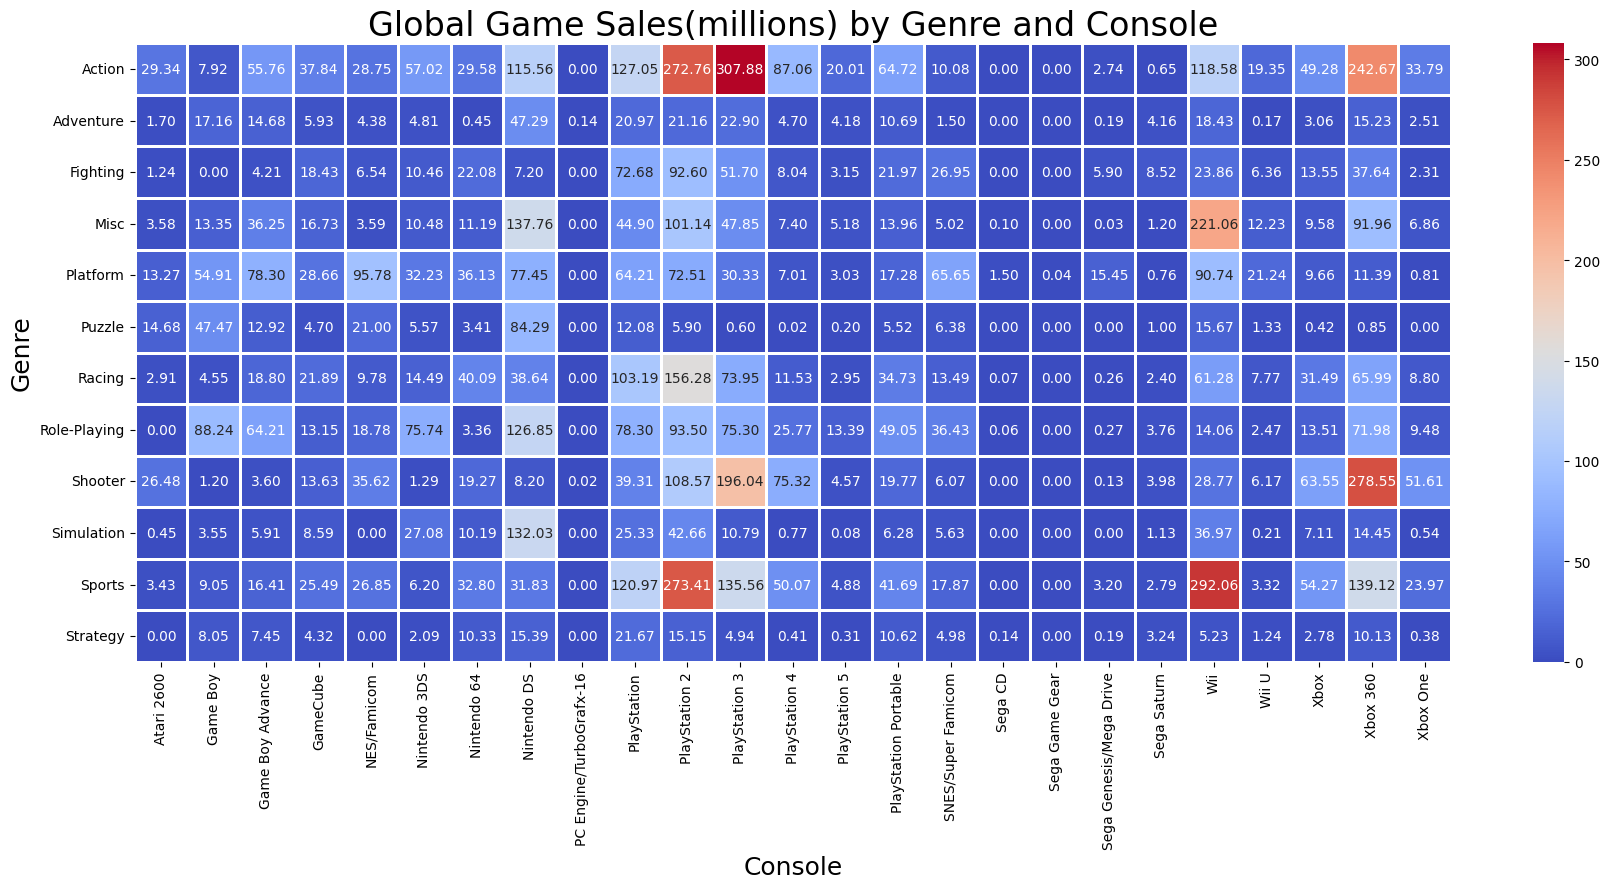

In [36]:
plt.figure(figsize=(18, 9))
sns.heatmap(genre_pivot, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.75)
plt.title("Global Game Sales(millions) by Genre and Console", fontsize=24)
plt.xlabel('Console', fontsize=18)
plt.ylabel('Genre', fontsize= 18)
plt.tight_layout()


The sports, action and racing genres helped to push the success of the PlayStation 2.

Despite having only the 5th highest game sales during its launch year, the PlayStation 2 is the most successful console, selling 155 million consoles with $1.255 billion in global game sales. Fueled by the North American region, its success was pushed by the popularity of its racing, sports, and action genres, which contributed significantly to its overall game sales.